In [1]:
import pandas as pd
df = pd.read_csv('data_set4.csv')
df.head()

,Message,Type,isDistress
0,making use of them for other and more private...,chatter,0
1,"other men , without the aid of some sort of e...",distress,1
2,infinite inferiority to the choice hidden han...,chatter,0
3,geographical empire encircles an imperial bra...,distress,1
4,Nantucket grimness and shagginess ; and in th...,chatter,0


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
x = df['Message']
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0,shuffle=True)

In [4]:
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [5]:
pipe = Pipeline(steps = [('tfid', TfidfVectorizer()), ('munb', MultinomialNB())])

In [6]:
grid = {
 'tfid__max_features' : [1000, 2000, 3000],
 'tfid__stop_words' : ['english', None],
 'tfid__ngram_range' : [(1,1),(1,2),(1,3)],
 'tfid__use_idf' : [True, False],
 'munb__alpha' : [0.1, 0.5, 1]
}

In [7]:
grid_run = GridSearchCV(pipe,grid,cv=5,n_jobs=-1)
grid_run.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfid', TfidfVectorizer()),
                                       ('munb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'munb__alpha': [0.1, 0.5, 1],
                         'tfid__max_features': [1000, 2000, 3000],
                         'tfid__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'tfid__stop_words': ['english', None],
                         'tfid__use_idf': [True, False]})

In [8]:
grid_run.score(X_train, y_train)
print(grid_run.score(X_test, y_test))

0.876


In [9]:
grid_run.best_params_

{'munb__alpha': 1,
 'tfid__max_features': 1000,
 'tfid__ngram_range': (1, 2),
 'tfid__stop_words': 'english',
 'tfid__use_idf': False}

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
predictions = grid_run.predict(x)
df['predictions'] = predictions

In [12]:
c_matrix = confusion_matrix(y, predictions)
c_matrix

array([[945,  55],
       [ 49, 951]], dtype=int64)

<AxesSubplot:>

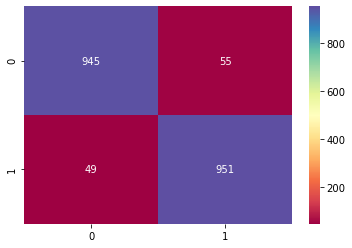

In [13]:
import seaborn as sns
tp, fp, fn, tn = confusion_matrix(y, predictions).ravel()
c_matrix = [[tp,fp],[fn,tn]]
 
#Plot the matrix
sns.heatmap(c_matrix, annot=True, fmt = "d", cmap="Spectral")